<a href="https://colab.research.google.com/github/LukaszLisowski2/Python-Finance-Projects/blob/main/Monte_Carlo_Simulation_(Alphabet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

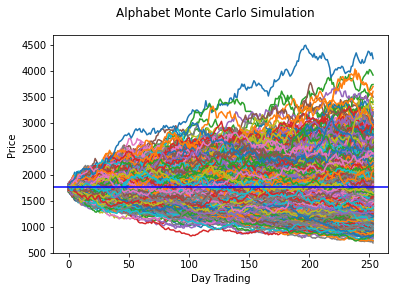

In [ ]:
import pandas_datareader.data as web
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


style.use = ("gg.plot2")

# Start and the end of the prices

start = dt.datetime(2016, 1, 1)
end = dt.datetime(2021, 1, 1)

#Getting prices

prices = web.DataReader("GOOGL", "yahoo", start, end)["Close"]
returns = prices.pct_change()

last_price = prices[-1]

#Number of simulations
SimulationNumber = 2000
TradingDays = 253

SimulationFrame = pd.DataFrame()
for x in range(SimulationNumber):
   count = 0
   daily_vol = returns.std()

   price_series = []
   price = last_price * ( 1 + np.random.normal(0, daily_vol))
   price_series.append(price)
   for y in range(TradingDays):
      if count == 253:
        break
      price =  price_series[count] * ( 1 + np.random.normal(0, daily_vol))
      price_series.append(price)
      count += 1
   SimulationFrame[x] = price_series

fig = plt.figure()
fig.suptitle("Alphabet Monte Carlo Simulation")
plt.plot(SimulationFrame)
plt.axhline(y = last_price, c = "b", linestyle = "-")
plt.xlabel("Day Trading")
plt.ylabel("Price")
plt.show()


